In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import prepare
import acquire 

In [2]:
df = acquire.get_merged_data()

In [3]:
df.head()

,Unnamed: 0_x,item_id,sale_amount,sale_date,sale_id,store_id,Unnamed: 0_y,store_address,store_city,store_state,store_zipcode,Unnamed: 0,item_brand,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df.dtypes

Unnamed: 0_x       int64
item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
Unnamed: 0_y       int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
Unnamed: 0         int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

In [5]:
df = prepare.sales_date_index(df)
df = prepare.sales_new_columns(df)

In [6]:
df.head()

,Unnamed: 0_x,item_id,sale_amount,sale_id,store_id,Unnamed: 0_y,store_address,store_city,store_state,store_zipcode,Unnamed: 0,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01 Jan,2 Tue,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,6,12018 Perrin Beitel Rd,San Antonio,TX,78217,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01 Jan,2 Tue,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,6,12018 Perrin Beitel Rd,San Antonio,TX,78217,45,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01 Jan,2 Tue,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,7,15000 San Pedro Ave,San Antonio,TX,78232,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01 Jan,2 Tue,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,8,735 SW Military Dr,San Antonio,TX,78221,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01 Jan,2 Tue,294.00


<AxesSubplot:xlabel='sale_date', ylabel='sales_total'>

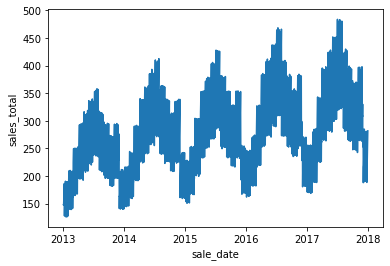

In [7]:
by_date = df.groupby('sale_date').mean()
sns.lineplot(data = by_date, x = 'sale_date', y = 'sales_total')

In [8]:
#1
train = by_date[:'2016']
test = by_date['2017':]

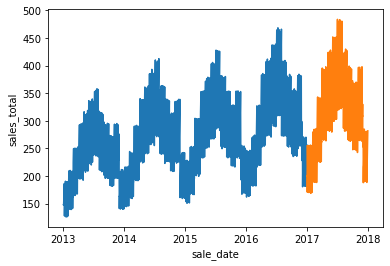

In [9]:
#2.
sns.lineplot(data = train, x = 'sale_date', y = 'sales_total')
sns.lineplot(data = test, x = 'sale_date', y = 'sales_total')
plt.show()

In [10]:
# 3 resample data

train_weekly_totals = train.resample('w').sum()
test_weekly_totals = test.resample('w').sum()



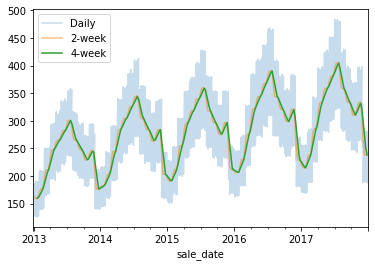

In [11]:
df.sales_total.resample('D').mean().plot(alpha=.25, label='Daily')
df.sales_total.resample('W').mean().rolling(2).mean().plot(alpha=.5,label='2-week')
df.sales_total.resample('W').mean().rolling(4).mean().plot(label='4-week')
plt.legend()
plt.show()


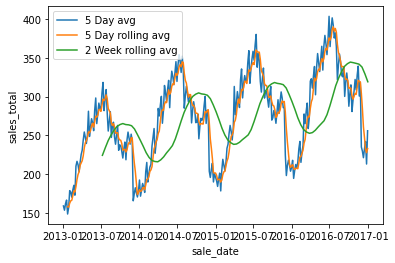

In [12]:
#4
sns.lineplot(data = train.resample('5D').mean(), x = 'sale_date', y = 'sales_total', label = "5 Day avg")
sns.lineplot(data = train.resample('5D').mean().rolling(5).mean(), x = 'sale_date', y = 'sales_total', label = '5 Day rolling avg')
sns.lineplot(data = train.resample('2w').mean().rolling(14).mean(), x = 'sale_date', y = 'sales_total', label = '2 Week rolling avg')

plt.legend()

Text(0.5, 1.0, 'Daily Difference in Total Sales')

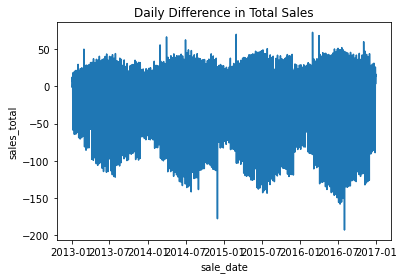

In [13]:
# 5.
sns.lineplot(data= train.diff(), x = 'sale_date', y = 'sales_total')
plt.title('Daily Difference in Total Sales')


Text(0.5, 1.0, 'Daily % Difference in Total Sales')

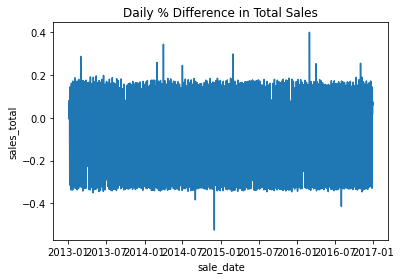

In [14]:
#6
sns.lineplot(data= train.diff() / train.shift(), x = 'sale_date', y = 'sales_total')
plt.title('Daily % Difference in Total Sales')

Text(0.5, 1.0, 'Weekly % Difference in Total Sales')

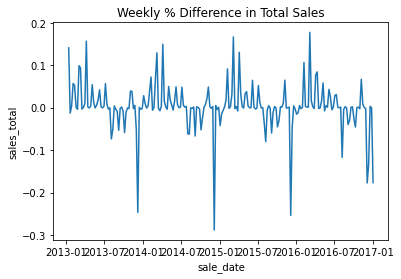

In [15]:
# 7. 
weekly = train.resample('w').sum()
sns.lineplot(data= weekly.diff() / weekly.shift(), x = 'sale_date', y = 'sales_total')
plt.title('Weekly % Difference in Total Sales')

Text(0.5, 1.0, 'Monthly % Difference in Total Sales')

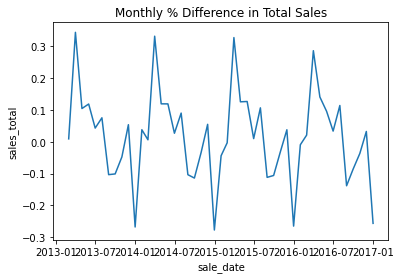

In [16]:
# 8.

monthly = train.resample('M').sum()
sns.lineplot(data= monthly.diff() / monthly.shift(), x = 'sale_date', y = 'sales_total')
plt.title('Monthly % Difference in Total Sales')

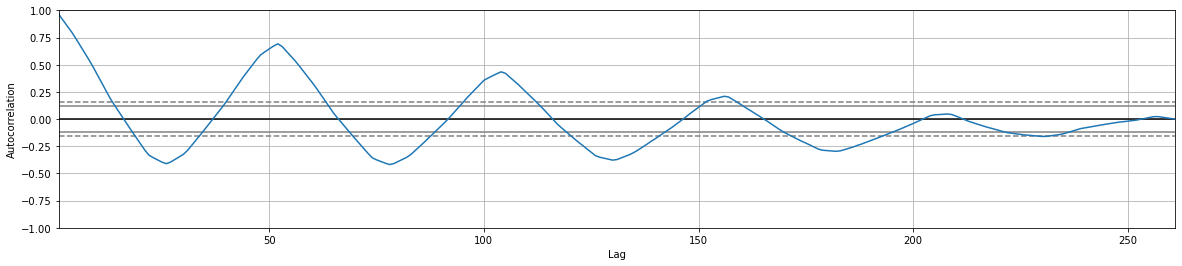

In [17]:
#9
plt.figure(figsize = (20,4))
pd.plotting.autocorrelation_plot(df.sales_total.resample('W').mean())
plt.show()

In [18]:
#10
import statsmodels.api as sm


# OPS data

In [31]:
#1
df = acquire.get_opsd()
df = prepare.prep_opsd(df)
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [25]:
train = df[:'2013']
test = df['2014':]

Train/Test split for consumption


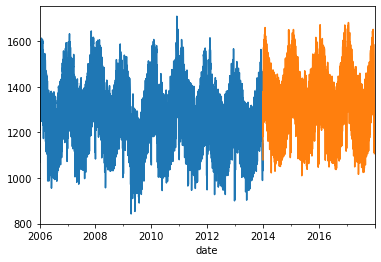

Train/Test split for wind


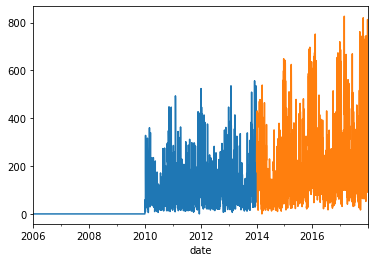

Train/Test split for solar


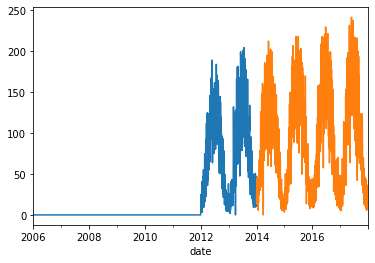

Train/Test split for wind_solar


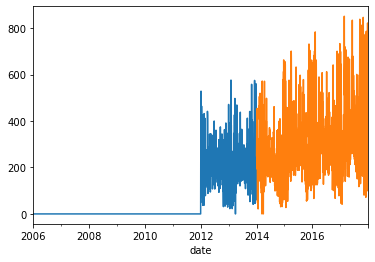

In [33]:
#2
for i in ['consumption','wind','solar','wind_solar']:
    print(f'Train/Test split for {i}')
    train[i].plot()
    test[i].plot()
    plt.show()

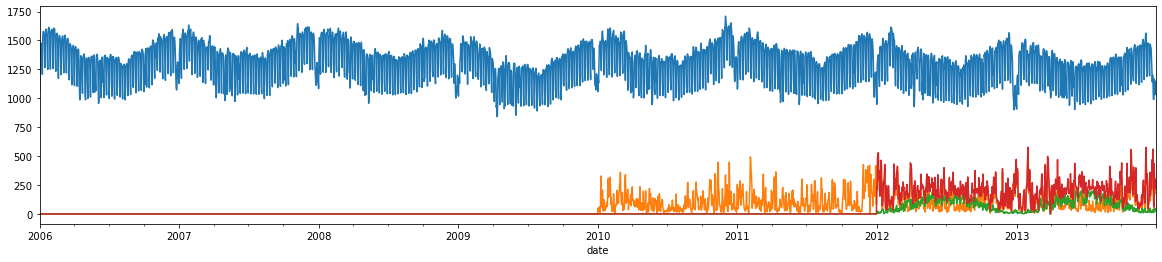

In [34]:
#3
plt.figure(figsize=(20,4))
train.consumption.plot(label='Electricity Consumed')
train.wind.plot(label='Wind Generation')
train.solar.plot(label='Solar Generation')
train['wind_solar'].plot(label='Total Renewable Generation')
plt.show()

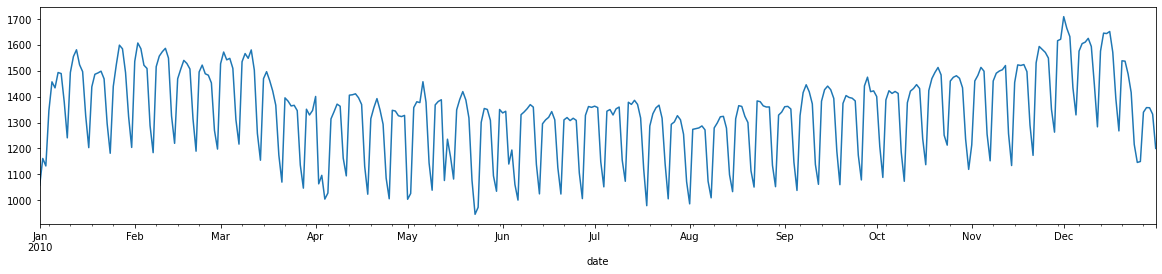

In [36]:
# 4
train10 = train[train.year == 2010]

plt.figure(figsize=(20,4))
train10.consumption.plot()
plt.show()

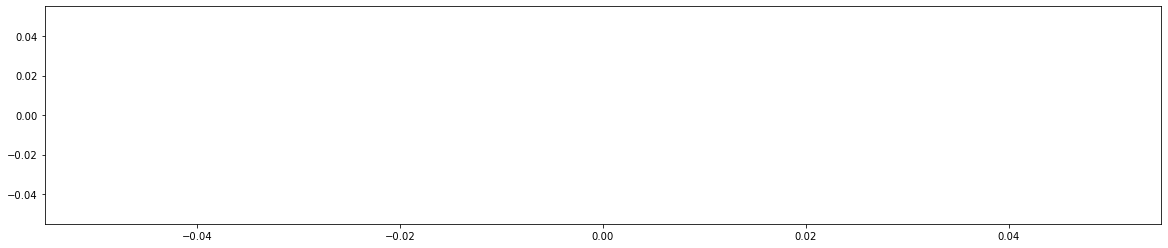

In [38]:
train_dec = train10[train10.month == 12]

plt.figure(figsize = (20,4))
plt.plot(train_dec.index.day_name()[:7], train_dec.consumption[:7])
plt.show()


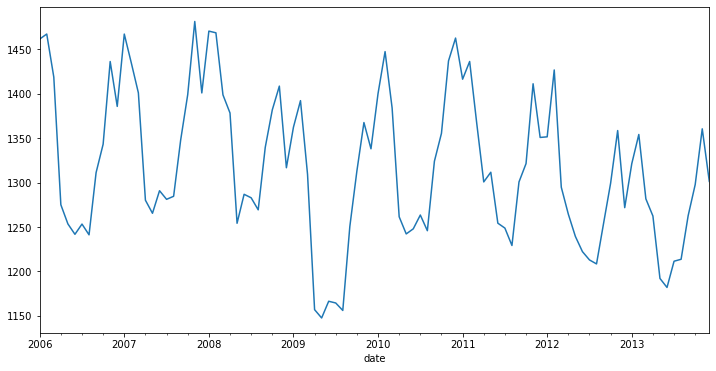

In [40]:
#5
plt.figure(figsize=(12,6))
train.resample('M').mean().consumption.plot(label='Monthly Electricity Consumed')
plt.show()

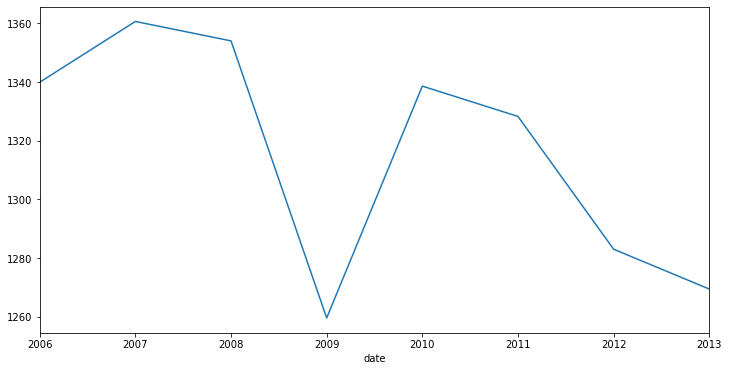

In [41]:
#6 
plt.figure(figsize=(12,6))
train.resample('Y').mean().consumption.plot(label='Yearly Electricity Consumed')
plt.show()
